<a href="https://colab.research.google.com/github/Jaypatvi/DL/blob/main/Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1a)
import numpy as np

def unitstep(v):
    if v >= 0:
        return 1
    else:
        return 0

def perceptron_learning(x, y_target, w, b, learning_rate):
    for _ in range(10000):
        total_error = 0
        for i in range(len(x)):
            v = np.dot(w, x[i]) + b
            y = unitstep(v)
            error = y_target[i] - y
            total_error += abs(error)

            w += learning_rate * error * x[i]
            b += learning_rate * error

        if total_error == 0:
            break
    return w, b

def not_logicfunction(x):
    wnot = -1
    bnot = 0.5
    return perceptron(np.array([x]), np.array([wnot]), bnot)

def and_logicfunction(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

def or_logicfunction(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

def xor_logicfunction():
    x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_target = np.array([0, 1, 1, 0])

    w = np.random.rand(2)
    b = np.random.rand()
    learning_rate = 0.1

    w, b = perceptron_learning(x, y_target, w, b, learning_rate)

    def predict(x_input):
        v = np.dot(w, x_input) + b
        return unitstep(v)

    return predict

xor_predict = xor_logicfunction()

test_inputs = [np.array([0, 1]), np.array([1, 1]), np.array([0, 0]), np.array([1, 0])]
for x_input in test_inputs:
    output = xor_predict(x_input)
    print(f"xor({x_input[0]}, {x_input[1]}) = {output}")



xor(0, 1) = 1
xor(1, 1) = 0
xor(0, 0) = 1
xor(1, 0) = 0


In [ ]:
#1b)
import numpy as np
import tensorflow as tf

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_data, y_data, epochs=1000, verbose=0)

for x_input in x_data:
    output = model.predict(np.array([x_input]))
    print(f"xor({int(x_input[0])}, {int(x_input[1])}) = {round(output[0][0])}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
xor(0, 0) = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
xor(0, 1) = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
xor(1, 0) = 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
xor(1, 1) = 0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.3193 - loss: 1.8992 - val_accuracy: 0.4036 - val_loss: 1.6918
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4188 - loss: 1.6501 - val_accuracy: 0.4546 - val_loss: 1.5374
Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 459s 584ms/step - accuracy: 0.3339 - loss: 1.7736 - val_accuracy: 0.5656 - val_loss: 1.2167
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 500s 581ms/step - accuracy: 0.6250 - loss: 1.0453 - val_accuracy: 0.6669 - val_loss: 0.9618


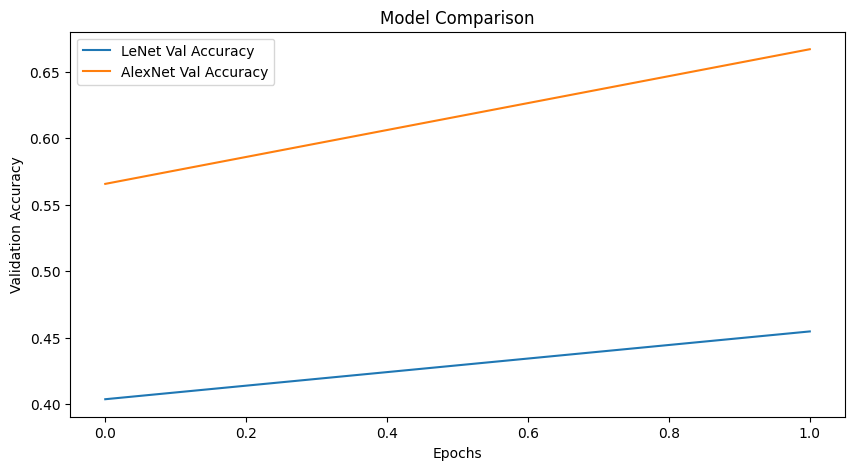

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

def load_data():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    X_train, X_test = X_train / 255.0, X_test / 255.0
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = load_data()

def create_lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3)),
        layers.AveragePooling2D(pool_size=2),
        layers.Conv2D(16, (5, 5), activation='tanh'),
        layers.AveragePooling2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def create_alexnet():
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=1, activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

def train_and_evaluate(model, X_train, y_train, X_test, y_test, optimizer_name):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=2, batch_size=64, validation_data=(X_test, y_test), verbose=1)
    return history

lenet = create_lenet()
history_lenet = train_and_evaluate(lenet, X_train, y_train, X_test, y_test, 'LeNet')

alexnet = create_alexnet()
history_alexnet = train_and_evaluate(alexnet, X_train, y_train, X_test, y_test, 'AlexNet')

def plot_comparison(histories, labels):
    plt.figure(figsize=(10, 5))
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label} Val Accuracy')
    plt.xlabel('Epochs')
    pend()
    plt.show()lt.ylabel('Validation Accuracy')
    plt.title('Model Comparison')
    plt.leg

plot_comparison([history_lenet, history_alexnet], ['LeNet', 'AlexNet'])


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

train_images = tf.image.resize(train_images, [32, 32])
test_images = tf.image.resize(test_images, [32, 32])
train_images = tf.image.grayscale_to_rgb(train_images)
test_images = tf.image.grayscale_to_rgb(test_images)

base_model = keras.applications.ResNet50(
    weights=None,
    input_shape=(32, 32, 3),
    classes=10
)

base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = base_model.fit(train_images, train_labels, epochs=2, validation_data=(test_images, test_labels))

test_loss, test_acc = base_model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/2
   5/1875 ━━━━━━━━━━━━━━━━━━━━ 1:03:05 2s/step - accuracy: 0.1307 - loss: 3.9752

KeyboardInterrupt: 

Faster R-CNN took 8.2239 seconds. Detected 43 objects with avg confidence 0.77.


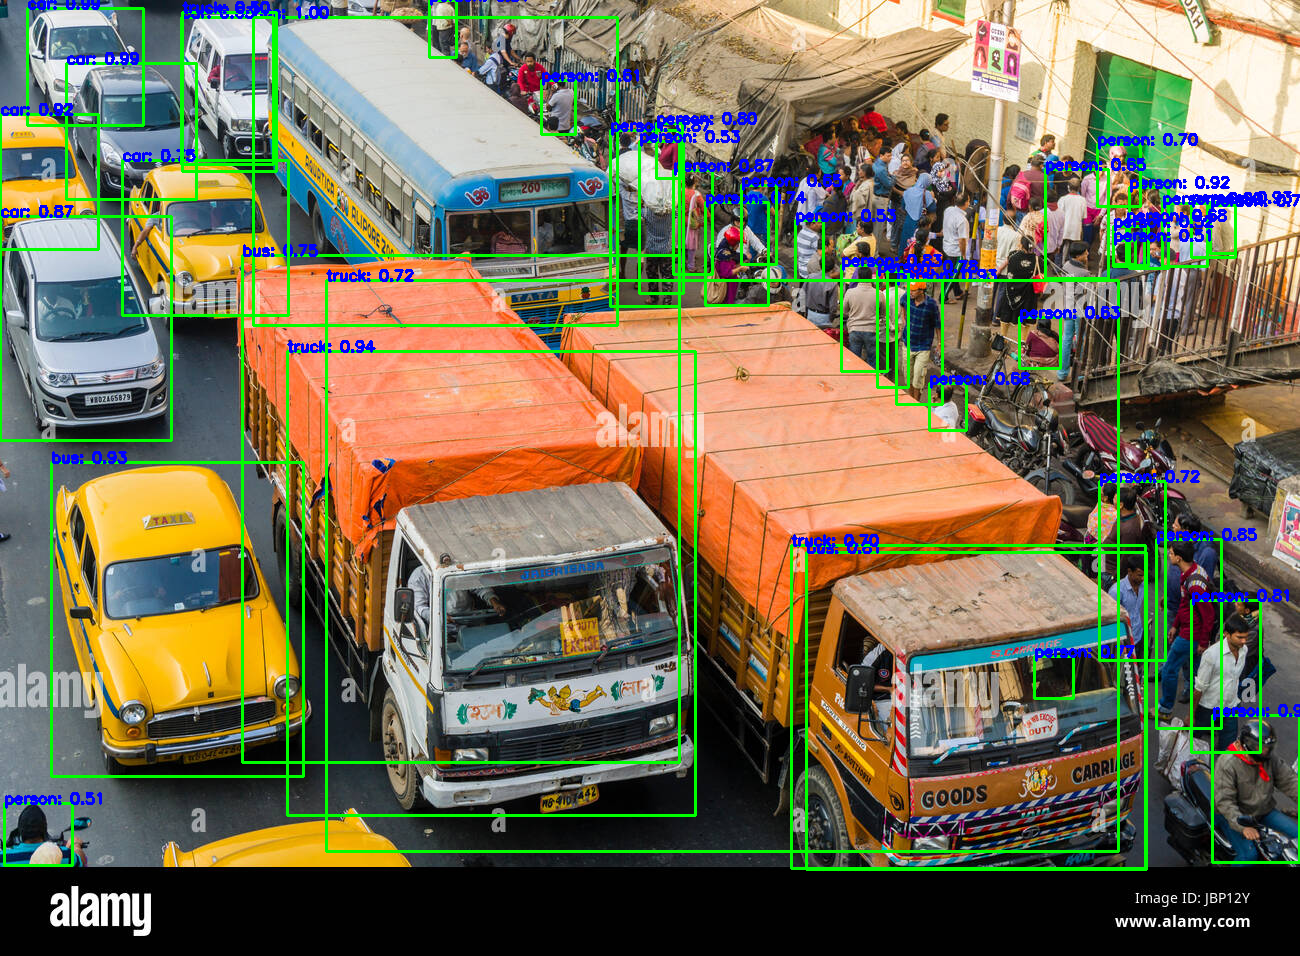

RetinaNet took 8.4283 seconds. Detected 19 objects with avg confidence 0.64.


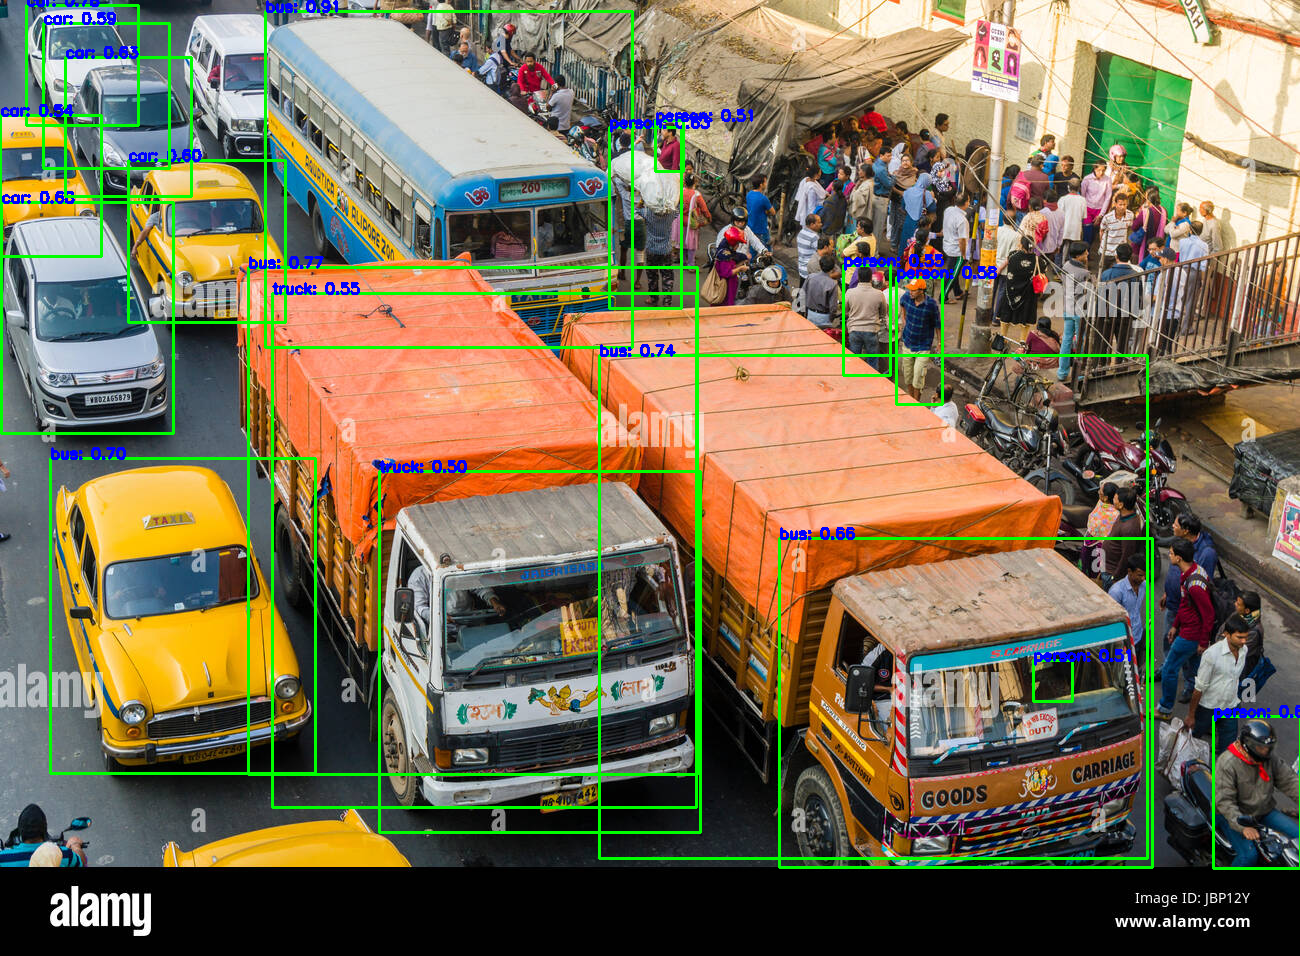

In [19]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time
import matplotlib.pyplot as plt

# Load Faster R-CNN model (pretrained)
faster_rcnn_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Load RetinaNet model (pretrained)
retinanet_model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)
retinanet_model.eval()

# COCO Category Names (For object labeling)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(model, image_path, confidence_threshold=0.5):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from '{image_path}'. Please check the file path and ensure the image exists.")
        return None, 0

    original_image = image.copy()
    image_tensor = F.to_tensor(image)

    with torch.no_grad():
        predictions = model([image_tensor])

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    detected_objects = 0
    total_confidence = 0
    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            score = scores[i]
            detected_objects += 1
            total_confidence += score
            start_point = (int(box[0]), int(box[1]))
            end_point = (int(box[2]), int(box[3]))
            cv2.rectangle(original_image, start_point, end_point, (0, 255, 0), 2)
            cv2.putText(original_image, f"{label}: {score:.2f}", start_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    if detected_objects > 0:
        average_confidence = total_confidence / detected_objects
    else:
        average_confidence = 0

    return original_image, detected_objects, average_confidence

def measure_time_and_detect(model, image_path):
    start_time = time.time()
    detected_image, detected_objects, average_confidence = detect_objects(model, image_path)
    elapsed_time = time.time() - start_time
    return elapsed_time, detected_image, detected_objects, average_confidence

# Path to input image
IMAGE_PATH = "/content/traffic-jam-on-a-busy-road-in-the-suburb-sealdah-JBP12Y.jpg"  # Replace with your image path

# Measure time and perform detection with Faster R-CNN
faster_rcnn_time, detected_image_faster_rcnn, faster_rcnn_objects, faster_rcnn_confidence = measure_time_and_detect(faster_rcnn_model, IMAGE_PATH)

# Measure time and perform detection with RetinaNet
retinanet_time, detected_image_retinanet, retinanet_objects, retinanet_confidence = measure_time_and_detect(retinanet_model, IMAGE_PATH)

# Display results
if detected_image_faster_rcnn is not None:
    print(f"Faster R-CNN took {faster_rcnn_time:.4f} seconds. Detected {faster_rcnn_objects} objects with avg confidence {faster_rcnn_confidence:.2f}.")
    cv2_imshow(detected_image_faster_rcnn)

if detected_image_retinanet is not None:
    print(f"RetinaNet took {retinanet_time:.4f} seconds. Detected {retinanet_objects} objects with avg confidence {retinanet_confidence:.2f}.")
    cv2_imshow(detected_image_retinanet)

# Plot the comparison bar chart for time
plt.figure(figsize=(10, 5))

# Bar chart for time comparison
plt.subplot(1, 2, 1)
plt.bar(['Faster R-CNN', 'RetinaNet'], [faster_rcnn_time, retinanet_time], color=['blue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Model Time Comparison')

# Bar chart for object count comparison
plt.subplot(1, 2, 2)
plt.bar(['Faster R-CNN', 'RetinaNet'], [faster_rcnn_objects, retinanet_objects], color=['blue', 'orange'])
plt.ylabel('Number of Detected Objects')
plt.title('Model Object Detection Comparison')

# Show both comparison charts
plt.tight_layout()
plt.show()
